**Импорт всех необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 40)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

## 1.1 Словесное описание признаков

<b><p>data.csv</p></b>
<ul>
<li>id: id транзакции </li>
<li>timestamp: дата продажи (транзакции) </li>
<li>full_sq: общая площадь  </li>
<li>life_sq: жилая площадь  </li>
<li>floor: этаж  </li>
<li>max_floor: количество этажей в здании </li>
<li>material: материал, из которого изговолены стены  </li>
<li>build_year: год строительства </li>
<li>num_room: количество жилых комнат </li>
<li>kitch_sq: площадь кухни </li>
<li>full_all: количество населения в регионе </li>
<li> state: жилищные условия </li>
<li>sub_area: название территории </li>
<li>price_doc: цена квартиры (целевая переменная) </li>
</ul>

<b><p>macro.csv</p></b>
<ul>
<li>timestamp : дата, на которую актуальны макроэкономические показатели </li>
<li>salary : средняя зарплата в регионе </li>
<li>fixed_basket: стоимость потребительской корзины </li>
<li>rent_price_3room_eco: стоимость аренды 3-х комнатного жилья эконом-класса </li>
<li>rent_price_2room_eco: стоимость аренды 2-х комнатного жилья эконом-класса </li>
<li>rent_price_1room_eco: стоимость аренды 1-но комнатного жилья эконом-класса </li>
<li>average_life_exp: средняя продолжительность жизни в регионе </li>
</ul>

## 1.2 Загрузка данных общее описание набора данных

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data.csv")
macro = pd.read_csv("https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data_macro.csv")

df_backup = df.copy()
macro_backup = macro.copy()

### 1.2.1 Базовый датасет

Вывести пример данных (первые строки и случайные строки)

In [3]:
df.head(10)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2750000
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,9000000
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,7011550
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,6.0,78616,Severnoe Butovo,7100000
4,8178,2013-05-28,38,20.0,15.0,NaN,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6450000
5,8189,2013-05-28,63,NaN,17.0,1.0,17.0,4.0,2013.0,2.0,1.0,247469,Nekrasovka,5903808
6,8258,2013-05-30,74,46.0,12.0,3.0,24.0,1.0,2004.0,3.0,9.0,27992,Juzhnoe Medvedkovo,12100000
7,8271,2013-05-31,93,93.0,3.0,1.0,1.0,1.0,2013.0,3.0,1.0,5740,Poselenie Pervomajskoe,5427640
8,8285,2013-06-01,51,30.0,7.0,3.0,17.0,1.0,2003.0,2.0,9.0,125111,Solncevo,7700000
9,8290,2013-06-03,77,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,11700000


In [4]:
df.sample(10)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
2802,13035,2013-12-12,43,24.0,5.0,2.0,5.0,2.0,1960.0,2.0,5.0,155572,Butyrskoe,6900000
8797,20359,2014-06-30,56,37.0,5.0,3.0,5.0,1.0,1964.0,3.0,6.0,76670,Zjuzino,8000000
5789,16671,2014-03-28,43,27.0,5.0,3.0,5.0,2.0,1959.0,2.0,5.0,75377,Hamovniki,7100000
11057,23100,2014-09-30,38,20.0,12.0,NaN,22.0,1.0,1988.0,1.0,10.0,132349,Novo-Peredelkino,1990000
244,9539,2013-07-31,60,43.0,8.0,NaN,9.0,1.0,1973.0,3.0,6.0,125111,Solncevo,7500000
126,9069,2013-07-09,33,17.0,6.0,4.0,9.0,2.0,1964.0,1.0,8.0,142462,Mozhajskoe,6500000
10685,22630,2014-09-18,58,33.0,14.0,2.0,22.0,1.0,2001.0,2.0,10.0,94564,Golovinskoe,1200000
2187,12295,2013-11-19,38,20.0,2.0,NaN,14.0,1.0,1986.0,1.0,8.0,85721,Brateevo,5050000
16666,30212,2015-06-09,34,19.0,6.0,2.0,16.0,1.0,1973.0,1.0,9.0,96959,Levoberezhnoe,7550000
1375,11303,2013-10-17,56,30.0,8.0,3.0,14.0,1.0,1985.0,2.0,12.0,91100,Donskoe,2345000


Размер набора данных

In [5]:
df.shape

(18866, 14)

In [6]:
df.size

264124

Описание типов данных по признакам

##### TODO: maybe simplify later

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
pattern = re.compile("^[0-9]{4}\.[0-9]$")
df['build_year'] = df['build_year'].apply(lambda x: x[:4] if isinstance(x, str) and pattern.match(x) else np.nan)

In [9]:
df['build_year'] = pd.to_numeric(df['build_year'], downcast='integer')

In [10]:
df['build_year'] = pd.to_datetime(df['build_year'], format='%Y', errors='coerce')

In [11]:
df.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907-01-01,1.0,12.0,75377,Hamovniki,2750000
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980-01-01,2.0,8.0,68630,Lianozovo,9000000
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014-01-01,3.0,12.0,9553,Poselenie Voskresenskoe,7011550
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970-01-01,2.0,6.0,78616,Severnoe Butovo,7100000
4,8178,2013-05-28,38,20.0,15.0,NaN,16.0,1.0,1982-01-01,1.0,8.0,112804,Filevskij Park,6450000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18866 entries, 0 to 18865
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          18866 non-null  int64         
 1   timestamp   18866 non-null  datetime64[ns]
 2   full_sq     18866 non-null  int64         
 3   life_sq     17291 non-null  float64       
 4   floor       18838 non-null  float64       
 5   state       15505 non-null  float64       
 6   max_floor   17445 non-null  float64       
 7   material    17445 non-null  float64       
 8   build_year  15961 non-null  datetime64[ns]
 9   num_room    17445 non-null  float64       
 10  kitch_sq    17445 non-null  float64       
 11  full_all    18866 non-null  int64         
 12  sub_area    18866 non-null  object        
 13  price_doc   18866 non-null  int64         
dtypes: datetime64[ns](2), float64(7), int64(4), object(1)
memory usage: 2.0+ MB


In [13]:
df.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907-01-01,1.0,12.0,75377,Hamovniki,2750000
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980-01-01,2.0,8.0,68630,Lianozovo,9000000
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014-01-01,3.0,12.0,9553,Poselenie Voskresenskoe,7011550
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970-01-01,2.0,6.0,78616,Severnoe Butovo,7100000
4,8178,2013-05-28,38,20.0,15.0,NaN,16.0,1.0,1982-01-01,1.0,8.0,112804,Filevskij Park,6450000


Базовые статистики по признакам

In [14]:
df.describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
count,18866.0000,18866.0000,17291.0000,18838.0000,15505.0000,17445.0000,17445.0000,17445.0000,17445.0000,1.8866e+04,1.8866e+04
mean,18799.7886,53.9409,34.2592,7.2937,2.2013,12.4233,1.8901,1.9348,7.2064,1.5972e+05,7.5824e+06
std,7082.4287,44.1162,59.9446,5.1912,0.8528,6.2798,1.5061,0.8642,26.9816,3.0435e+05,4.9838e+06
min,9.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.5460e+03,1.0000e+05
25%,13513.2500,38.0000,20.0000,3.0000,2.0000,9.0000,1.0000,1.0000,5.0000,4.8439e+04,5.1000e+06
50%,19043.5000,49.0000,30.0000,6.0000,2.0000,12.0000,1.0000,2.0000,7.0000,8.7713e+04,6.6855e+06
75%,24748.7500,63.0000,43.0000,10.0000,3.0000,17.0000,2.0000,3.0000,9.0000,1.2535e+05,8.9000e+06
max,30473.0000,5326.0000,7478.0000,77.0000,33.0000,57.0000,6.0000,19.0000,2014.0000,1.7167e+06,9.5122e+07


Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

- Примерно четверть объектов имеют одну жилую комнату, 9 этажей в здании, третий этаж
- Самое высокое здание имеет 77 этажей

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

- full_sq, life_sq, num_room, floor, kitch_sq, sub_area, max_floor - наиболее подходят для предсказания цены квартиры, именно данными параметрами задается "престижность" жилья
- sub_area район жилья может влиять на цену, например если район находится в центре города или близок с объектами логистики

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [15]:
missing_values_quantity = df.isna().sum()
missing_values_quantity

id               0
timestamp        0
full_sq          0
life_sq       1575
floor           28
state         3361
max_floor     1421
material      1421
build_year    2905
num_room      1421
kitch_sq      1421
full_all         0
sub_area         0
price_doc        0
dtype: int64

In [16]:
missing_data_percent_ratio = round(df.isna().mean() * 100, 2)
missing_data_percent_ratio

id             0.00
timestamp      0.00
full_sq        0.00
life_sq        8.35
floor          0.15
state         17.82
max_floor      7.53
material       7.53
build_year    15.40
num_room       7.53
kitch_sq       7.53
full_all       0.00
sub_area       0.00
price_doc      0.00
dtype: float64

Есть ли аномальные данные в столбцах? Если да, то укажите на них и объясните, почему считаете аномальными

- 0.0 - минимальная общая площадь, жилая площадь, этаж, количество этажей в здании, количество жилых комнат, площадь кухни скорее всего говорит о том что эти данные нужно опустить из таблицы при дальнейшем анализе
- Написано что max_floor - количество этажей в здании и floor - этаж на котором находится единица, но в таблице явно видно что max_floor - 57, а floor - 77, похоже что где-то пропуск, или ошибка если единица находится в данном здании
- state - максимальное значение 33 похоже на выброс, учитывая то что среднее значение равно 2.2
- build_year - некоторые данные были в неправильном формате, много пропусков по отношению с другими столбцами, не стоит учитывать пропуски в дальнейшем анализе, и год не может быть равен нулю
- kitch_sq - максимальное значение похоже на выброс

### 1.2.2 Макро показатели

Вывести пример данных (первые строки и случайные строки)

In [17]:
macro.head(10)

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,2010-01-01,38410.5,11443.63,NaN,NaN,NaN,74.2
1,2010-01-02,38410.5,11443.63,NaN,NaN,NaN,74.2
2,2010-01-03,38410.5,11443.63,NaN,NaN,NaN,74.2
3,2010-01-04,38410.5,11443.63,NaN,NaN,NaN,74.2
4,2010-01-05,38410.5,11443.63,NaN,NaN,NaN,74.2
5,2010-01-06,38410.5,11443.63,NaN,NaN,NaN,74.2
6,2010-01-07,38410.5,11443.63,NaN,NaN,NaN,74.2
7,2010-01-08,38410.5,11443.63,NaN,NaN,NaN,74.2
8,2010-01-09,38410.5,11443.63,NaN,NaN,NaN,74.2
9,2010-01-10,38410.5,11443.63,NaN,NaN,NaN,74.2


In [18]:
macro.sample(10)

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
1277,2013-07-01,55485.2,15163.82,48.08,41.42,32.55,76.37
1755,2014-10-22,61208.0,16269.79,52.82,43.85,35.37,76.70
1689,2014-08-17,61208.0,16134.39,52.81,43.11,34.83,76.70
1115,2013-01-20,55485.2,14289.40,45.20,40.25,32.84,76.37
2108,2015-10-10,64310.0,19140.87,49.67,38.84,30.41,76.77
913,2012-07-02,48830.4,13762.47,43.42,38.25,31.10,75.74
2134,2015-11-05,64310.0,19213.32,49.62,39.48,30.48,76.77
1241,2013-05-26,55485.2,14983.92,47.35,40.77,2.31,76.37
147,2010-05-28,38410.5,11702.15,NaN,NaN,NaN,74.20
1634,2014-06-23,61208.0,16295.00,48.70,41.18,33.06,76.70


Размер набора данных

In [19]:
macro.shape

(2484, 7)

In [20]:
macro.size

17388

Описание типов данных по признакам

In [21]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             2484 non-null   object 
 1   salary                2191 non-null   float64
 2   fixed_basket          2484 non-null   float64
 3   rent_price_3room_eco  2211 non-null   float64
 4   rent_price_2room_eco  2211 non-null   float64
 5   rent_price_1room_eco  2211 non-null   float64
 6   average_life_exp      2191 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.0+ KB


Базовые статистики по признакам

In [22]:
macro['timestamp'] = pd.to_datetime(macro['timestamp'])

In [23]:
macro.describe()

,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,2191.0000,2484.0000,2211.0000,2211.0000,2211.0000,2191.0000
mean,52188.9331,15331.4980,47.2997,38.8954,31.0024,75.9282
std,9068.5590,2789.1363,3.0702,5.0352,3.9841,0.8699
min,38410.5000,11443.6300,37.5400,0.1000,2.3100,74.2000
25%,44898.7000,12992.4400,45.5300,37.9300,29.7800,75.7400
50%,48830.4000,14983.9200,47.3500,39.4700,31.1100,75.7900
75%,61208.0000,18295.0700,49.3500,41.3000,33.0600,76.7000
max,64310.0000,20422.5000,53.2100,43.8500,35.3700,76.7700


Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

- Чем меньше комнат в арендуемом жилье, тем дешевле его арендовать
- В жилье в котором две комнаты, сильнее разбрасываются цены за счет наивысшего стандартного отклонения, относительно других арендуемых единиц
- Общние показатели не сильно влияют на ожидаемую продолжительность жизни - малое стандартное отклонение

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

- Количество комнат (rent_price_3room_eco, rent_price_2room_eco, rent_price_1room_eco) - наиболее весомый показатель для предсказания цены арендуемого жилья
- timestamp - в зависимости от ситуации в мире и экономики на данный момент цены могут изменяться
- average_life_exp - в некоторых случаях может влиять на цену, в зависимости от района и условий жизни, больше average_life_exp - больше цена из-за более благополучных условий проживания

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [24]:
# Missing data in units
missing_values_quantity = macro.isna().sum()
missing_values_quantity

timestamp                 0
salary                  293
fixed_basket              0
rent_price_3room_eco    273
rent_price_2room_eco    273
rent_price_1room_eco    273
average_life_exp        293
dtype: int64

In [25]:
# Missing data in percentage
missing_data_percent_ratio = round(macro.isna().mean() * 100, 2)
missing_data_percent_ratio

timestamp                0.00
salary                  11.80
fixed_basket             0.00
rent_price_3room_eco    10.99
rent_price_2room_eco    10.99
rent_price_1room_eco    10.99
average_life_exp        11.80
dtype: float64

Есть ли аномальные данные в стoлбцах? Если да, то укажите на них и объясните, почему считаете аномальными


- Минимальное значение цены аренды rent_price_2room_eco - 0.1
- Минимальное значение цены аренды rent_price_1room_eco - 2.3100

## 1.3 Замените все ранее найденные ошибочные данные на None. Заполните все пропуски в данных: которые были и которые появились. Используйте как стратегии изученные на занятии, так и логику, которая вытекает из самих данных

### 1.3.1 Главный набор данных

- Решил провизуализировать данные, глазами в таблицу сложно смотреть

In [26]:
def visualize_dataframe(dataframe, ignore_types=['datetime64[ns]', 'object'], ignore_columns=['id'], method='boxplot'):
    column_names = dataframe.columns.values
    for column_name in column_names:
        if dataframe[column_name].dtypes in ignore_types or column_name in ignore_columns:
            continue
        if method == 'boxplot':
            sns.boxplot(x = dataframe[column_name])
            plt.show()
        if method == 'histplot':
            sns.histplot(x = dataframe[column_name])
            plt.show()

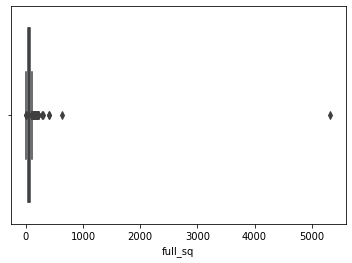

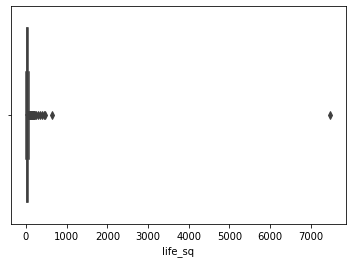

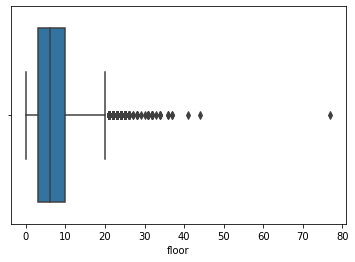

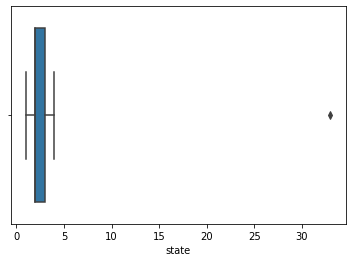

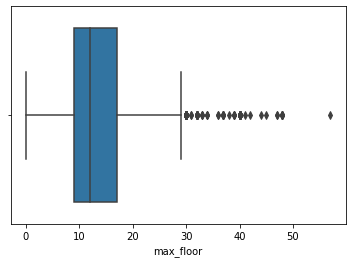

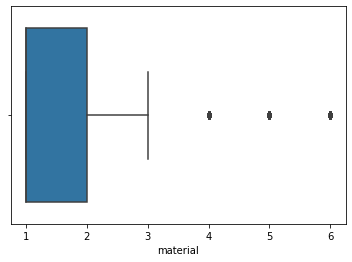

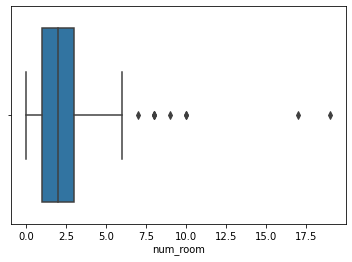

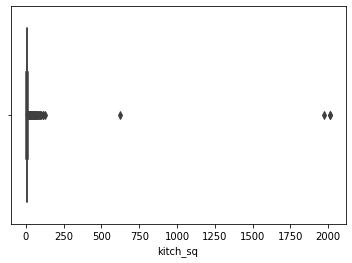

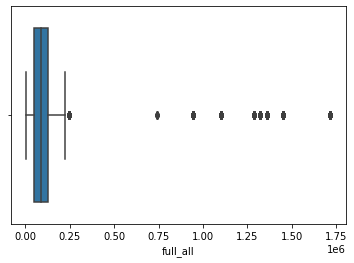

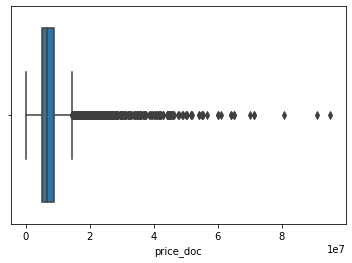

In [27]:
visualize_dataframe(df)

- Явно видно что есть выбросы в full_sq, life_sq, floor, state, kitch_sq, остальное выглядит в общей мере адекватно

- Функция которая будет обнулять выбросы, выходящие за 99.99% процентиль
- Помимо чего добавлю аргумент в функцию roll_num переменный, чтобы обнуление можно было делать несколько разa, некоторые выбросы например в колонне kitch_sq, обнуляются только после второго раза вызова функции

In [28]:
def clear_outliers(dataframe, roll_num=1, high_quantile=0.99, low_quantile=0.01, on_columns=None, ignore_types=['datetime64[ns]', 'object'], ignore_columns=['id']):
    def do_clean(columns_to_clean):
        for column_name in columns_to_clean:
            if dataframe[column_name].dtypes in ignore_types or column_name in ignore_columns:
                continue
            for i in range(roll_num):
                # 99.99% high percentile
                # percentile_high = dataframe[column_name].quantile(0.9999)
                percentile_high = dataframe[column_name].quantile(high_quantile)
                # 0.001% low percentile
                percentile_low = dataframe[column_name].quantile(low_quantile)
                # making outliers obsolete 
                dataframe[column_name] = dataframe[column_name].apply(lambda x: np.nan if x > percentile_high else x)
                dataframe[column_name] = dataframe[column_name].apply(lambda x: np.nan if x < percentile_low else x)
        return dataframe

    if on_columns is not None:
        return do_clean(on_columns)

    all_column_names = dataframe.columns.values
    return do_clean(all_column_names)

In [29]:
df = clear_outliers(df, high_quantile=0.9999, low_quantile=0.0001, roll_num=2)

- Собственно выбрал 99.99% процентиль потому что выбросов у нас не так много и при этом они больше среднего показателя в 100+ раз

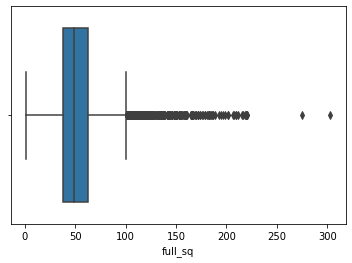

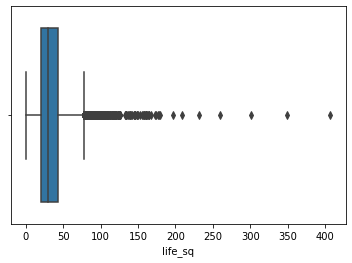

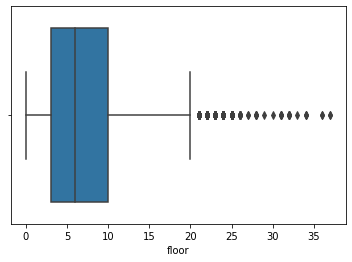

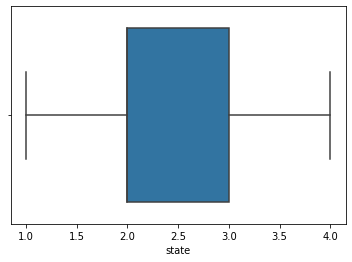

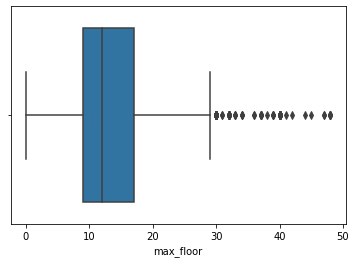

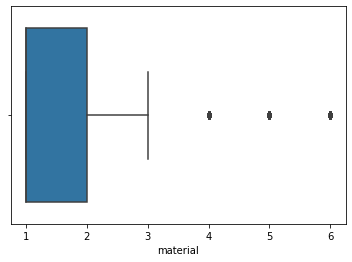

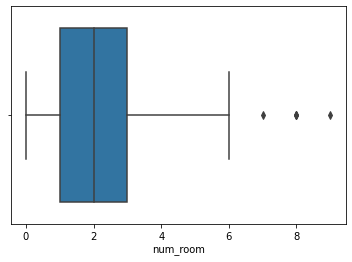

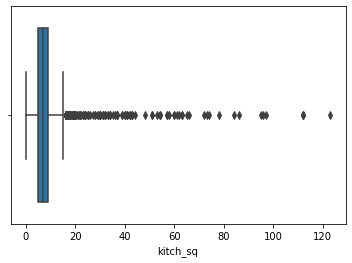

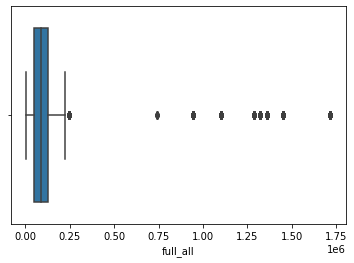

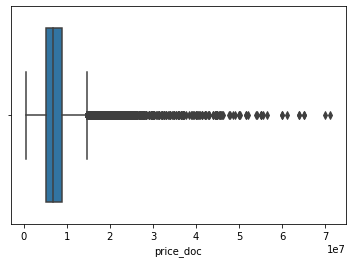

In [30]:
visualize_dataframe(df)

- После обнуления выбросов, собственно видно что данные стали более стабильными, если можно так сказать и более сгруппированы вокруг среднего значения

In [31]:
def count_nan(dataframe):
    column_names = dataframe.columns.values
    for column_name in column_names:
        print(f'{column_name}: {dataframe[column_name].isna().sum()}')

In [32]:
count_nan(df)

id: 0
timestamp: 0
full_sq: 6
life_sq: 1579
floor: 31
state: 3362
max_floor: 1422
material: 1421
build_year: 2905
num_room: 1425
kitch_sq: 1425
full_all: 1
sub_area: 0
price_doc: 7


- Замена пустых значений на среднее значение конкретной колонны

In [33]:
def fill_nan_data(dataframe, ignore_types=['datetime64[ns]', 'object'], ignore_columns=['id']):
    column_names = dataframe.columns.values
    for column_name in column_names:
        if dataframe[column_name].dtypes in ignore_types or column_name in ignore_columns:
            continue
        column_mean = dataframe[column_name].mean()
        dataframe[column_name].fillna(column_mean, inplace=True)
    return dataframe

In [34]:
df = fill_nan_data(df, ignore_columns=['sub_area'])
df.sample(15)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
17129,2473,2012-06-09,73.0,51.000,2.0,2.1993,12.4208,1.8901,NaT,1.9321,6.8285,55590.0,Krasnosel'skoe,1.3030e+07
1485,11440,2013-10-22,44.0,28.000,6.0,3.0000,6.0000,1.0000,1980-01-01,2.0000,6.0000,165727.0,Mar'ino,6.0000e+06
16026,29370,2015-04-24,37.0,17.000,10.0,3.0000,18.0000,1.0000,1973-01-01,1.0000,8.0000,81887.0,Hovrino,7.3000e+06
10826,22805,2014-09-23,37.0,19.000,7.0,2.0000,16.0000,1.0000,1982-01-01,1.0000,8.0000,65972.0,Ostankinskoe,7.9000e+06
9504,21200,2014-07-31,65.0,46.000,11.0,2.0000,16.0000,5.0000,1977-01-01,3.0000,7.0000,1716730.0,Birjulevo Vostochnoe,7.9000e+06
1267,11172,2013-10-11,107.0,64.000,17.0,3.0000,23.0000,1.0000,2008-01-01,4.0000,11.0000,83369.0,Rjazanskij,1.6400e+07
298,9693,2013-08-07,80.0,35.000,5.0,1.0000,40.0000,4.0000,2012-01-01,2.0000,14.0000,1362363.0,Akademicheskoe,1.6738e+07
14501,27476,2015-01-23,72.0,49.000,5.0,2.0000,5.0000,2.0000,1957-01-01,3.0000,8.0000,111023.0,Ochakovo-Matveevskoe,1.2000e+07
5314,16075,2014-03-15,74.0,42.000,12.0,2.1993,17.0000,1.0000,1997-01-01,3.0000,10.0000,85721.0,Brateevo,1.1000e+07
1258,11157,2013-10-10,45.0,29.000,8.0,3.0000,12.0000,1.0000,1972-01-01,2.0000,6.0000,123000.0,Kon'kovo,8.0000e+06


- Количество пустых значений после замены nan на среднее значение конкретной колонны

In [35]:
count_nan(df)

id: 0
timestamp: 0
full_sq: 0
life_sq: 0
floor: 0
state: 0
max_floor: 0
material: 0
build_year: 2905
num_room: 0
kitch_sq: 0
full_all: 0
sub_area: 0
price_doc: 0


- Визуализируем датафрейм еще раз

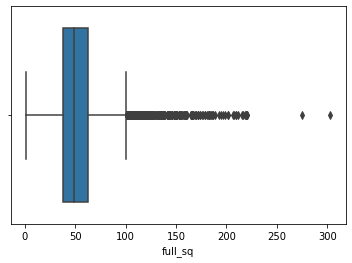

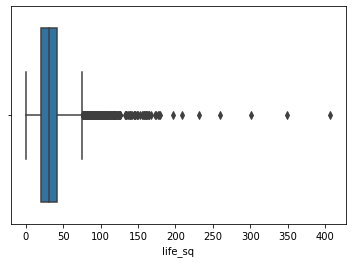

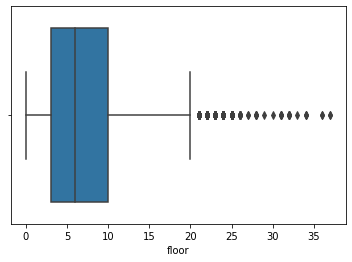

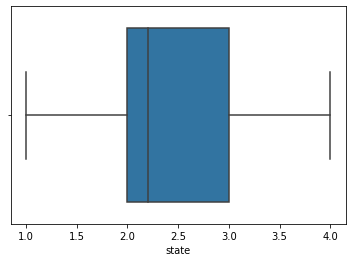

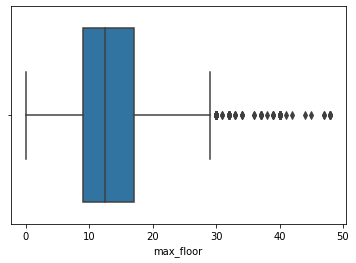

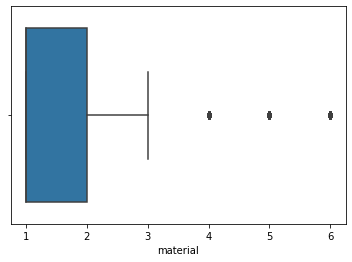

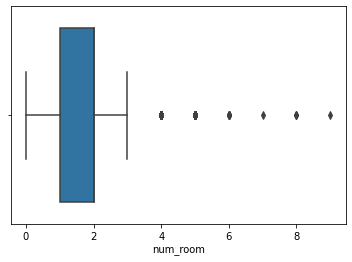

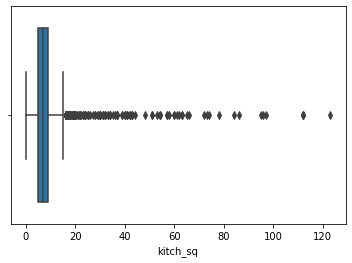

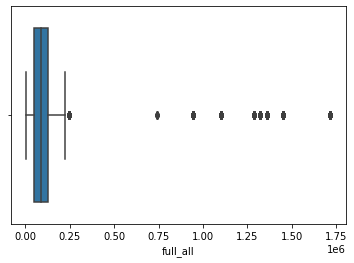

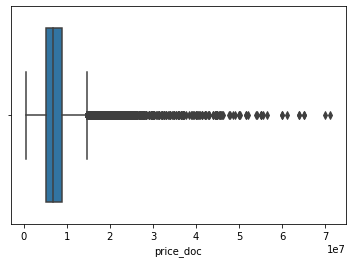

In [36]:
visualize_dataframe(df)

### 1.3.2 Набор с макропоказателями

- В визуализации видно что есть небольшое количество выборосов, но ситуация явно лучше чем в первом датасете

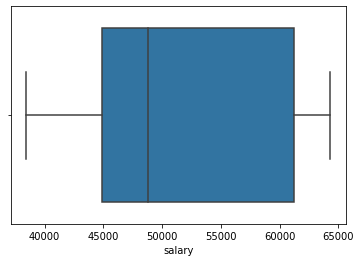

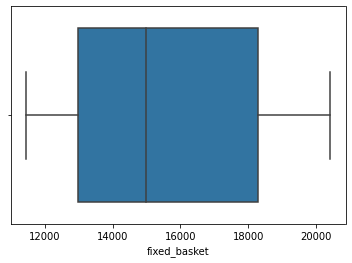

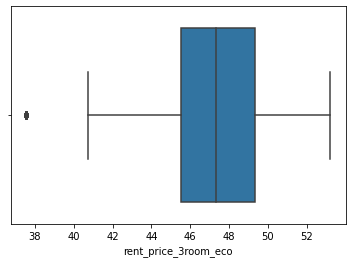

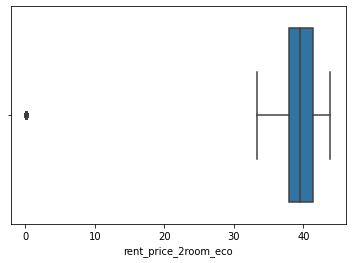

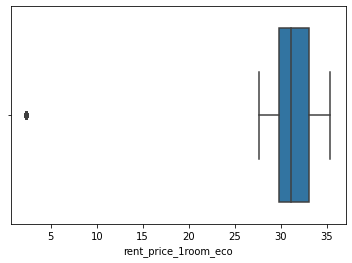

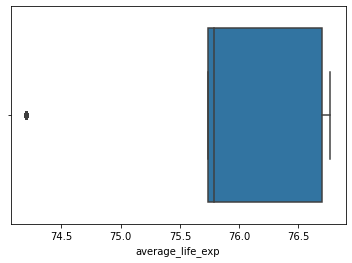

In [37]:
visualize_dataframe(macro)

- Уберем некоторые очевидные выбросы, проигнорируя некоторые колонны в которых максимальные значения адекватные

In [38]:
macro = clear_outliers(macro, low_quantile=0.2, ignore_columns=['rent_price_3room_eco', 'average_life_exp'])

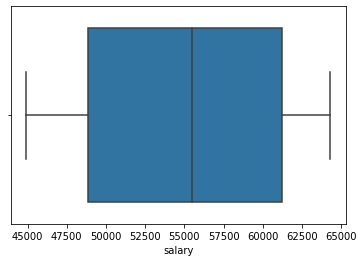

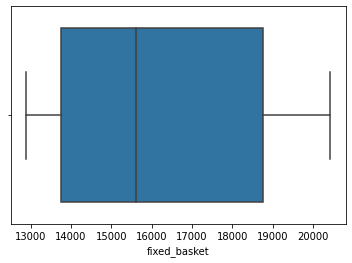

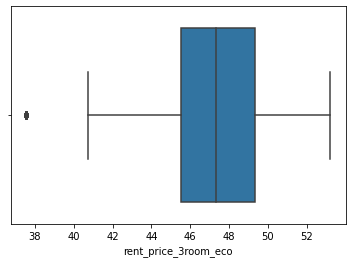

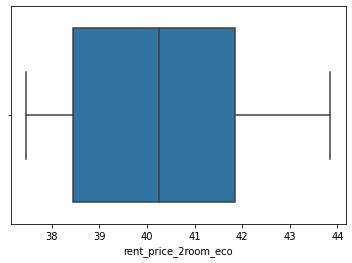

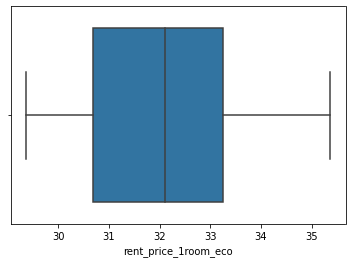

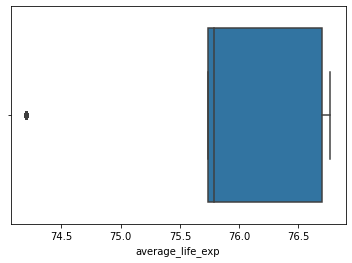

In [39]:
visualize_dataframe(macro)

In [40]:
count_nan(macro)

timestamp: 0
salary: 658
fixed_basket: 485
rent_price_3room_eco: 273
rent_price_2room_eco: 697
rent_price_1room_eco: 700
average_life_exp: 293


In [41]:
macro = fill_nan_data(macro)
macro.sample(15)

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
897,2012-06-16,48830.4000,13494.2300,46.2900,39.0000,30.4800,75.7400
2290,2016-04-09,54943.1106,19904.3100,47.9700,40.2572,32.0755,75.9282
1218,2013-05-03,55485.2000,14983.9200,47.3500,40.7700,32.0755,76.3700
2416,2016-08-13,54943.1106,20380.7300,46.4000,38.0400,29.6800,75.9282
2152,2015-11-23,64310.0000,19213.3200,49.6200,39.4800,30.4800,76.7700
401,2011-02-06,44898.7000,16131.2946,44.4100,40.2572,32.0755,75.7900
1732,2014-09-29,61208.0000,16165.3000,51.4100,43.2600,34.5200,76.7000
266,2010-09-24,54943.1106,16131.2946,47.2997,40.2572,32.0755,74.2000
1281,2013-07-05,55485.2000,15163.8200,48.0800,41.4200,32.5500,76.3700
327,2010-11-24,54943.1106,16131.2946,42.0700,40.2572,32.0755,74.2000


In [42]:
count_nan(macro)

timestamp: 0
salary: 0
fixed_basket: 0
rent_price_3room_eco: 0
rent_price_2room_eco: 0
rent_price_1room_eco: 0
average_life_exp: 0


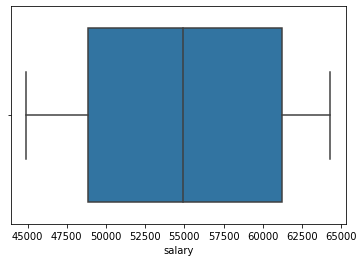

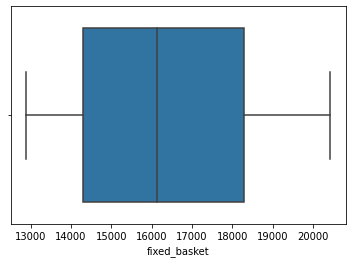

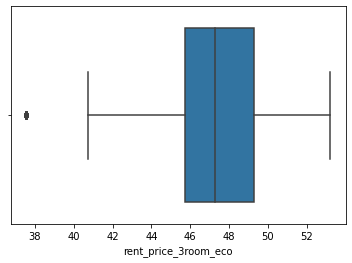

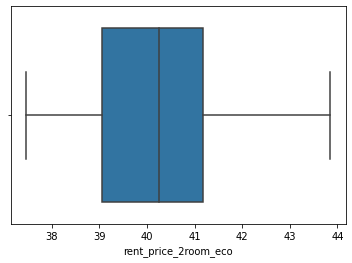

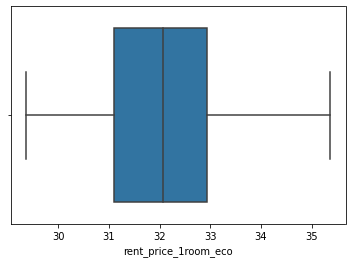

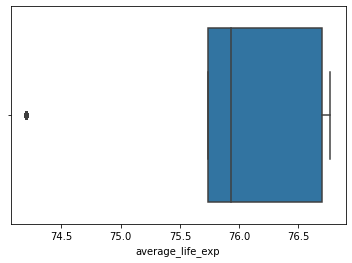

In [43]:
visualize_dataframe(macro)

- После махинаций со средними и пустыми значениями почти ничего не изменилось, только ушли аномальные выбросы

## 1.4 Обогатите основной набор данных данными из макропоказателей и поместите в переменную `df_full`

In [44]:
df.head(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,8059,2013-05-21,11.0,11.0,2.0,3.0000,5.0,2.0,1907-01-01,1.0,12.0,75377.0,Hamovniki,2750000.0
1,8138,2013-05-25,53.0,30.0,10.0,3.0000,16.0,1.0,1980-01-01,2.0,8.0,68630.0,Lianozovo,9000000.0
2,8156,2013-05-27,77.0,41.0,2.0,1.0000,17.0,6.0,2014-01-01,3.0,12.0,9553.0,Poselenie Voskresenskoe,7011550.0
3,8157,2013-05-27,45.0,27.0,6.0,3.0000,9.0,1.0,1970-01-01,2.0,6.0,78616.0,Severnoe Butovo,7100000.0
4,8178,2013-05-28,38.0,20.0,15.0,2.1993,16.0,1.0,1982-01-01,1.0,8.0,112804.0,Filevskij Park,6450000.0


In [45]:
df.shape

(18866, 14)

In [46]:
macro.head(5)

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,2010-01-01,54943.1106,16131.2946,47.2997,40.2572,32.0755,74.2
1,2010-01-02,54943.1106,16131.2946,47.2997,40.2572,32.0755,74.2
2,2010-01-03,54943.1106,16131.2946,47.2997,40.2572,32.0755,74.2
3,2010-01-04,54943.1106,16131.2946,47.2997,40.2572,32.0755,74.2
4,2010-01-05,54943.1106,16131.2946,47.2997,40.2572,32.0755,74.2


In [47]:
macro.shape

(2484, 7)

In [48]:
df_full = df.merge(macro, on='timestamp', how='left')

In [49]:
df_full.head(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,8059,2013-05-21,11.0,11.0,2.0,3.0000,5.0,2.0,1907-01-01,1.0,12.0,75377.0,Hamovniki,2750000.0,55485.2,14983.92,47.35,40.77,32.0755,76.37
1,8138,2013-05-25,53.0,30.0,10.0,3.0000,16.0,1.0,1980-01-01,2.0,8.0,68630.0,Lianozovo,9000000.0,55485.2,14983.92,47.35,40.77,32.0755,76.37
2,8156,2013-05-27,77.0,41.0,2.0,1.0000,17.0,6.0,2014-01-01,3.0,12.0,9553.0,Poselenie Voskresenskoe,7011550.0,55485.2,14983.92,47.35,40.77,32.0755,76.37
3,8157,2013-05-27,45.0,27.0,6.0,3.0000,9.0,1.0,1970-01-01,2.0,6.0,78616.0,Severnoe Butovo,7100000.0,55485.2,14983.92,47.35,40.77,32.0755,76.37
4,8178,2013-05-28,38.0,20.0,15.0,2.1993,16.0,1.0,1982-01-01,1.0,8.0,112804.0,Filevskij Park,6450000.0,55485.2,14983.92,47.35,40.77,32.0755,76.37


In [50]:
df_full.shape

(18866, 20)

In [51]:
df_full.describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,1.8866e+04,1.8866e+04,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000
mean,18799.7886,53.5985,33.7460,7.2863,2.1993,12.4208,1.8901,1.9321,6.8285,1.5972e+05,7.5673e+06,59882.2021,16215.5343,49.8407,41.7767,33.5046,76.5993
std,7082.4287,21.0011,17.8515,5.1497,0.7399,6.0300,1.4482,0.8100,4.6199,3.0435e+05,4.8533e+06,3718.2141,1161.5241,1.8440,1.2149,1.1631,0.2299
min,9.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.6930e+03,5.0000e+05,44898.7000,12922.9700,43.4200,37.7300,30.2900,75.7400
25%,13513.2500,38.0000,20.0000,3.0000,2.0000,9.0000,1.0000,1.0000,5.0000,4.8439e+04,5.1000e+06,55485.2000,15417.3400,48.7000,41.1700,32.9600,76.3700
50%,19043.5000,49.0000,31.0000,6.0000,2.1993,12.4208,1.0000,2.0000,6.8285,8.7713e+04,6.6900e+06,61208.0000,16165.3000,49.7500,41.9100,33.6500,76.7000
75%,24748.7500,63.0000,42.0000,10.0000,3.0000,17.0000,2.0000,2.0000,9.0000,1.2535e+05,8.9000e+06,61208.0000,16648.7000,50.9300,42.6400,34.3500,76.7000
max,30473.0000,303.0000,407.0000,37.0000,4.0000,48.0000,6.0000,9.0000,123.0000,1.7167e+06,7.1200e+07,64310.0000,18745.2800,53.2100,43.8500,35.3700,76.7700


## 1.5 Проверьте данные на наличие выбросов. По каждому столбцу. Напишите своё мнение: нужно ли в каждой из ситуаций обрабатывать выбросы, или можно оставить. Если нужно обработать, то примените один из изученных подходов, либо предложите свой

### 1.5.1 Главный набор данных

- С выбросами было уже немного работы до этого, но можно на всякий случай посчитать процентное количество информации которая может считаться выбросом

In [52]:
def iqr_percent_detection(dataframe):
    num_column_names = dataframe.select_dtypes('number').columns.values
    for col_name in num_column_names:
        # skipping id column
        if col_name in ['id']:
            continue
        q1 = dataframe[col_name].quantile(0.25)
        q3 = dataframe[col_name].quantile(0.75)
        iqr = q3 - q1
        outliers = np.where((dataframe[col_name] < (q1 - 1.5 * iqr)) | (dataframe[col_name] > (q3 + 1.5 * iqr)))
        print(f"{col_name} column outliers percent ratio: {len(outliers[0]) / dataframe[col_name].shape[0] * 100}")

In [53]:
iqr_percent_detection(df)

full_sq column outliers percent ratio: 2.963002226227075
life_sq column outliers percent ratio: 3.0743135799851586
floor column outliers percent ratio: 2.0990140994381425
state column outliers percent ratio: 0.0
max_floor column outliers percent ratio: 0.6148627159970317
material column outliers percent ratio: 17.338068482985264
num_room column outliers percent ratio: 2.332237888264603
kitch_sq column outliers percent ratio: 1.3728400296830277
full_all column outliers percent ratio: 8.645181808544471
price_doc column outliers percent ratio: 5.941906074419591


- Сильных выбросов не наблюдается

### 1.5.2 Набор с макропоказателями

In [54]:
iqr_percent_detection(macro)

salary column outliers percent ratio: 0.0
fixed_basket column outliers percent ratio: 0.0
rent_price_3room_eco column outliers percent ratio: 1.247987117552335
rent_price_2room_eco column outliers percent ratio: 0.0
rent_price_1room_eco column outliers percent ratio: 0.0
average_life_exp column outliers percent ratio: 14.69404186795491


- Также как и до этого, данный датасет был более чистым по сравнению с первым df, так что проблем не наблюдается
- Только в колонне average_life_exp есть что-то похожее на выброс, но как видно из предыдущей визуализации, данное значение в принципе адекватное

## 1.6 Создайте не менее 5 новых признаков на основе существующих данных. Опишите текстом обоснование создания каждой. Признаки должны привносить некую новую информацию для понимания цены квартиры

In [55]:
df_full_backup = df_full.copy()

In [56]:
# just to be safe
# df_full = df_full_backup.copy()

In [57]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18866 entries, 0 to 18865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    18866 non-null  int64         
 1   timestamp             18866 non-null  datetime64[ns]
 2   full_sq               18866 non-null  float64       
 3   life_sq               18866 non-null  float64       
 4   floor                 18866 non-null  float64       
 5   state                 18866 non-null  float64       
 6   max_floor             18866 non-null  float64       
 7   material              18866 non-null  float64       
 8   build_year            15961 non-null  datetime64[ns]
 9   num_room              18866 non-null  float64       
 10  kitch_sq              18866 non-null  float64       
 11  full_all              18866 non-null  float64       
 12  sub_area              18866 non-null  object        
 13  price_doc       

In [58]:
df_full.describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,1.8866e+04,1.8866e+04,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000
mean,18799.7886,53.5985,33.7460,7.2863,2.1993,12.4208,1.8901,1.9321,6.8285,1.5972e+05,7.5673e+06,59882.2021,16215.5343,49.8407,41.7767,33.5046,76.5993
std,7082.4287,21.0011,17.8515,5.1497,0.7399,6.0300,1.4482,0.8100,4.6199,3.0435e+05,4.8533e+06,3718.2141,1161.5241,1.8440,1.2149,1.1631,0.2299
min,9.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.6930e+03,5.0000e+05,44898.7000,12922.9700,43.4200,37.7300,30.2900,75.7400
25%,13513.2500,38.0000,20.0000,3.0000,2.0000,9.0000,1.0000,1.0000,5.0000,4.8439e+04,5.1000e+06,55485.2000,15417.3400,48.7000,41.1700,32.9600,76.3700
50%,19043.5000,49.0000,31.0000,6.0000,2.1993,12.4208,1.0000,2.0000,6.8285,8.7713e+04,6.6900e+06,61208.0000,16165.3000,49.7500,41.9100,33.6500,76.7000
75%,24748.7500,63.0000,42.0000,10.0000,3.0000,17.0000,2.0000,2.0000,9.0000,1.2535e+05,8.9000e+06,61208.0000,16648.7000,50.9300,42.6400,34.3500,76.7000
max,30473.0000,303.0000,407.0000,37.0000,4.0000,48.0000,6.0000,9.0000,123.0000,1.7167e+06,7.1200e+07,64310.0000,18745.2800,53.2100,43.8500,35.3700,76.7700


In [59]:
df_full.sample(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
13988,26831,2014-12-18,52.0,30.0,15.0,3.0,17.0,1.0,2007-01-01,2.0,9.0,122873.0,Severnoe,2.3000e+06,61208.0,16910.54,49.89,42.64,34.33,76.70
4560,15165,2014-02-18,112.0,1.0,8.0,1.0,1.0,1.0,2014-01-01,3.0,1.0,122862.0,Izmajlovo,2.0684e+07,61208.0,15730.81,49.24,41.79,33.65,76.70
13733,26523,2014-12-16,37.0,19.0,5.0,3.0,5.0,2.0,1930-01-01,1.0,9.0,142243.0,Lefortovo,6.9000e+06,61208.0,16910.54,49.89,42.64,34.33,76.70
3141,13477,2013-12-26,56.0,31.0,9.0,2.0,14.0,2.0,1972-01-01,2.0,9.0,76284.0,Nagatinskij Zaton,9.3500e+06,55485.2,15417.34,48.50,42.00,33.97,76.37
3039,13344,2013-12-23,51.0,30.0,10.0,3.0,17.0,1.0,1985-01-01,2.0,8.0,67710.0,Krylatskoe,1.1200e+07,55485.2,15417.34,48.50,42.00,33.97,76.37


- 1) признак price_per_square: цена за квадратный метр

In [60]:
df_full['price_per_square'] = df_full['price_doc'] / df_full['full_sq']

- 2) признак material_worth: весомость цены материала из которого изготовлена единица

In [61]:
df_full['material_worth'] = df_full['price_doc'] / df_full['material']

- перевод строчного названия района в его числовой эквивалент

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le = LabelEncoder()
label = le.fit_transform(df_full['sub_area'])

In [64]:
df_full.drop('sub_area', axis=1, inplace=True)
df_full['sub_area'] = label

- 3) sub_area_prestige: престижность района как отношение его локации к стоимости единицы

In [65]:
df_full['sub_area_prestige'] = df_full['price_doc'] / df_full['sub_area']

- 4) region_life_cost: зависимость между зарплатой и потребительской корзиной, показывающий общую стоимость проживания

In [66]:
df_full['region_life_cost'] = df_full['salary'] / df_full['fixed_basket']

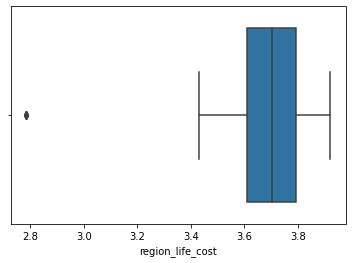

In [67]:
sns.boxplot(data=df_full, x='region_life_cost')

- Наблюдается небольшой выброс, избавимся на всякий случай

In [68]:
df_full = clear_outliers(df_full, on_columns=['region_life_cost'])

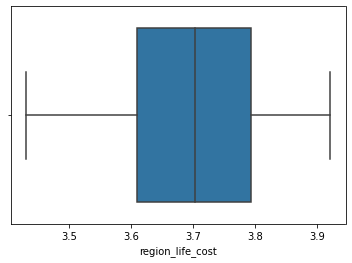

In [69]:
sns.boxplot(data=df_full, x='region_life_cost')

- 5) max_floor_price_impact: зависимость между количеством этажей в здании в котором продается квартира, и ее ценой

In [70]:
df_full['max_floor_price_impact'] = df_full['max_floor'] / df_full['price_doc']

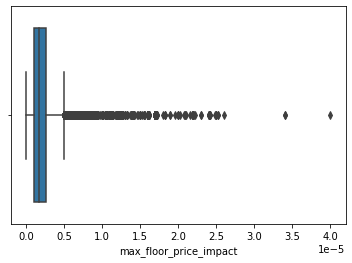

In [71]:
sns.boxplot(data=df_full, x='max_floor_price_impact')

- Тоже избавимся от пары выбросов

In [72]:
df_full = clear_outliers(df_full, on_columns=['max_floor_price_impact'])

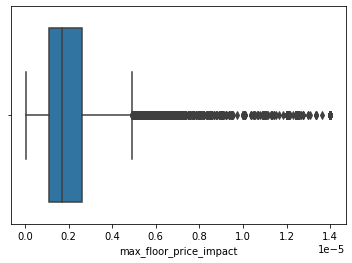

In [73]:
sns.boxplot(data=df_full, x='max_floor_price_impact')

- 6) building_novelty: предположение что здание оснащено современными технологиями исходя из года постройки

In [74]:
df_full['building_novelty'] = df_full['build_year'].apply(lambda x: True if x.year > 2010 else False)

In [75]:
df_full.sample(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,price_per_square,material_worth,sub_area,sub_area_prestige,region_life_cost,max_floor_price_impact,building_novelty
10575,22494,2014-09-13,51.0,30.0,10.0,4.0000,14.0,1.0,1995-01-01,2.0,8.0,221709.0,6900000.0,61208.0,16165.30,51.41,43.26,34.52,76.70,135294.1176,6.9000e+06,48,143750.0000,3.7864,2.0290e-06,False
9784,21507,2014-08-13,41.0,41.0,2.0,1.0000,2.0,4.0,2015-01-01,1.0,1.0,112221.0,7375615.0,61208.0,16134.39,52.81,43.11,34.83,76.70,179893.0488,1.8439e+06,18,409756.3889,3.7936,2.7116e-07,True
228,9494,2013-07-29,32.0,18.0,8.0,4.0000,9.0,1.0,1970-01-01,1.0,6.0,111874.0,5200000.0,55485.2,15163.82,48.08,41.42,32.55,76.37,162500.0000,5.2000e+06,17,305882.3529,3.6591,1.7308e-06,False
15629,28870,2015-04-03,38.0,38.0,1.0,1.0000,5.0,2.0,NaT,3.0,0.0,116742.0,5132545.0,64310.0,18642.71,50.36,39.92,31.41,76.77,135066.9737,2.5663e+06,134,38302.5746,3.4496,9.7418e-07,False
12624,25124,2014-11-21,41.0,18.0,1.0,2.1993,5.0,1.0,1967-01-01,2.0,16.0,143661.0,4150000.0,61208.0,16648.70,53.21,43.23,34.30,76.70,101219.5122,4.1500e+06,132,31439.3939,3.6764,1.2048e-06,False


- Так как я обнулял некоторые выбросы, заменим их значения NaN на среднее

In [76]:
count_nan(df_full)

id: 0
timestamp: 0
full_sq: 0
life_sq: 0
floor: 0
state: 0
max_floor: 0
material: 0
build_year: 2905
num_room: 0
kitch_sq: 0
full_all: 0
price_doc: 0
salary: 0
fixed_basket: 0
rent_price_3room_eco: 0
rent_price_2room_eco: 0
rent_price_1room_eco: 0
average_life_exp: 0
price_per_square: 0
material_worth: 0
sub_area: 0
sub_area_prestige: 0
region_life_cost: 8
max_floor_price_impact: 370
building_novelty: 0


In [77]:
df_full = fill_nan_data(df_full)

In [78]:
count_nan(df_full)

id: 0
timestamp: 0
full_sq: 0
life_sq: 0
floor: 0
state: 0
max_floor: 0
material: 0
build_year: 2905
num_room: 0
kitch_sq: 0
full_all: 0
price_doc: 0
salary: 0
fixed_basket: 0
rent_price_3room_eco: 0
rent_price_2room_eco: 0
rent_price_1room_eco: 0
average_life_exp: 0
price_per_square: 0
material_worth: 0
sub_area: 0
sub_area_prestige: 0
region_life_cost: 0
max_floor_price_impact: 0
building_novelty: 0


## 1.7 Провести визуальный анализ всех признаков

Ко всем графикам писать выводы текстом. Что вы видите, почему построили именно такую диаграмму

### 1.7.1 Анализ признаков по отдельности (где нужно делать группировки, преобразования категориальных типов данных к числовым, смотреть в разрезе других категориальных признаков)

### Общая визуализация

### Создадим тепловую карту для выделения моментов на которые стоит обратить внимание

In [79]:
df_full_visual = df_full.copy()
df_full_visual.drop(labels=['id'], axis=1, inplace=True)

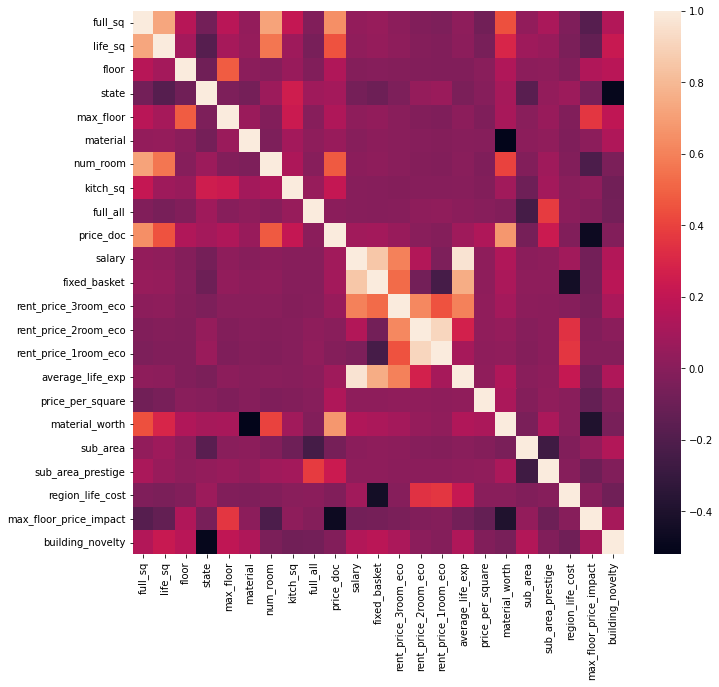

In [80]:
fig, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(df_full_visual.corr(), annot=False)
plt.show()

### Из тепловой карты можно визуально выделить несколько моментов:

1. full_sq - life_sq
2. full_sq - num_room
3. full_sq - price_doc
4. life_sq - num_room
5. life_sq - price_doc
6. max_floor - floor
7. max_floor_price_impact - max_floor
8. material_worth - price_doc
9. average_life_exp - salary
10. average_life_exp - fixed_basket
11. average_life_exp - rent_price_3room_eco
12. average_life_exp - rent_price_2room_eco
13. average_life_exp - rent_price_1room_eco
14. price_doc - num_room
15. material_worth - num_room
16. salary - fixed_basket


In [153]:
# def hist_plot_columns(dataframe, cols, start=0, end=300, num=10):
def hist_plot_columns(dataframe, cols, start=0, num=10):
    for col in dataframe[cols]:
        fig, ax = plt.subplots(figsize=(25,6))
        sns.histplot(data=dataframe, x=col, bins=20, kde=True, color='blue')
        ax.set_title(col, size=15)
        end = dataframe[col].max()
        ax.set_xticks(np.linspace(start, end, num))
        plt.show()

### 1. full_sq - life_sq

In [143]:
# max_full_square = df_full['full_sq'].max()

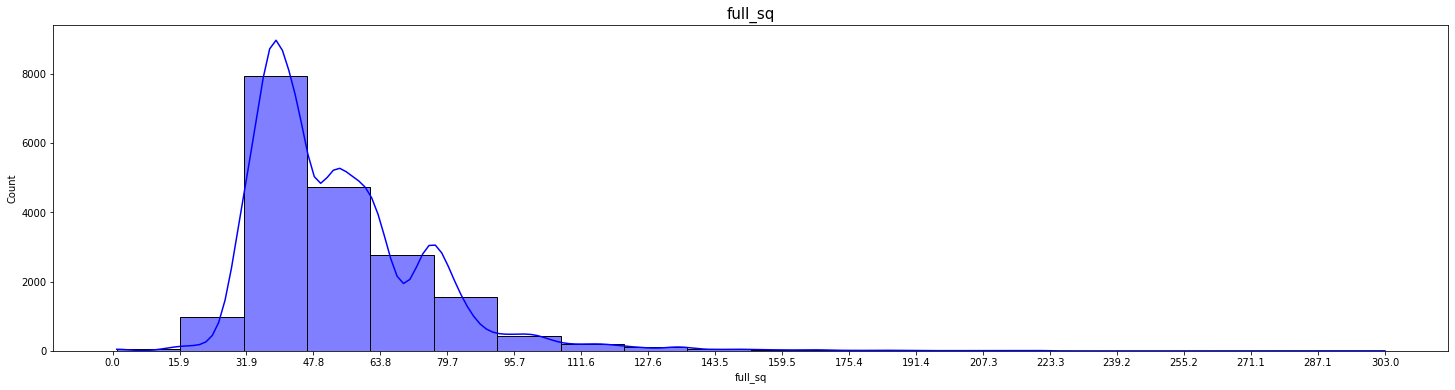

In [154]:
hist_plot_columns(df_full, ['full_sq'], num = 20)

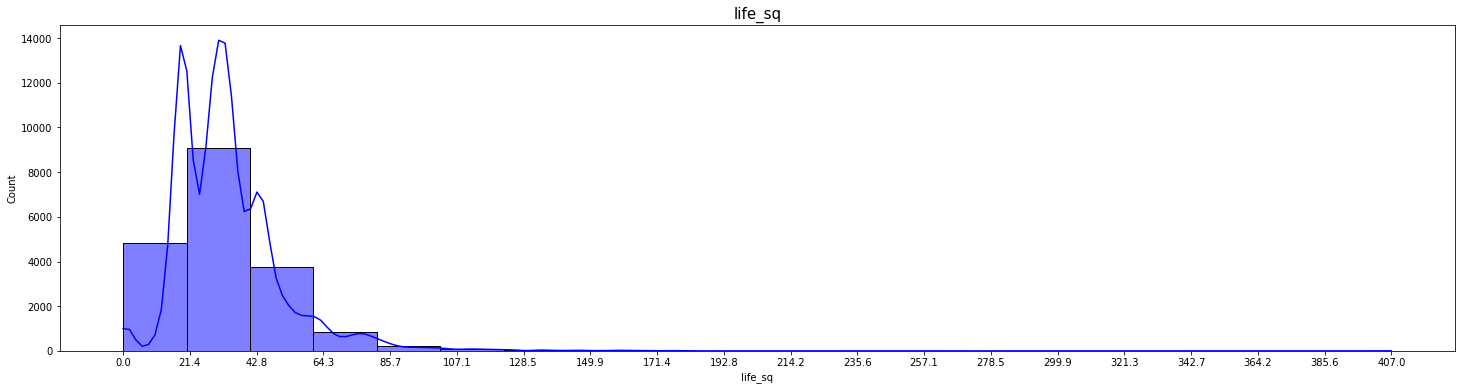

In [157]:
hist_plot_columns(df_full, ['life_sq'], num = 20)

На данных графиках можно увидеть, что большинство площадей квартир приходится на 30-60 единиц и при этом большинство жилого пространства имеют площадь 15 - ~45 единиц, из этого можно сделать вывод о том что большинство квартир имеют прямую зависимость - чем больше общая площадь - тем больше жилое пространство, и большинство квартин не очень большие, помимо чего, если приглядеться ближе к значениям от 70 на обоих графиках, то жилая площадь несоизмеримо падает по отношению к общей, скорее всего от того, что общая площадь выделена под что-то другое.

### 2. full_sq - num_room

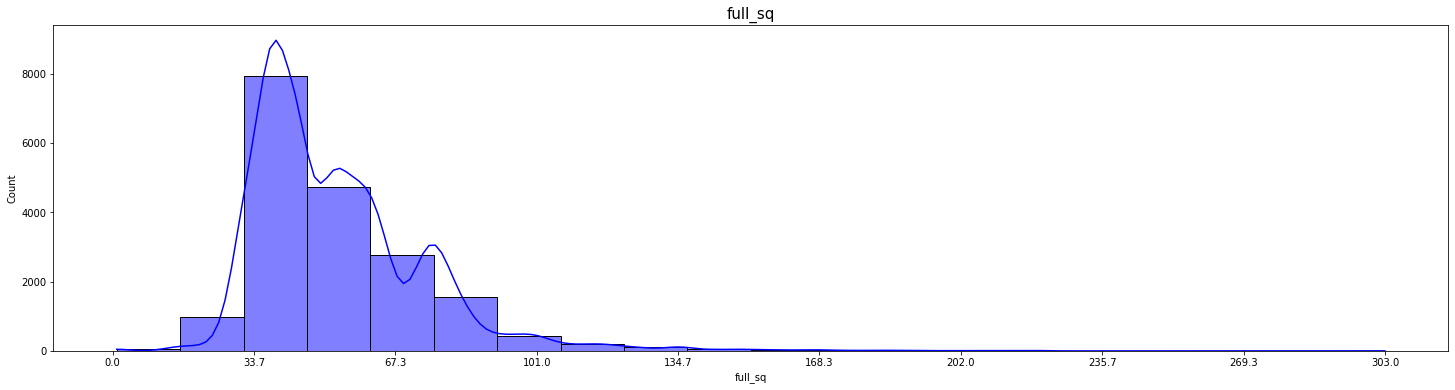

In [158]:
hist_plot_columns(df_full, ['full_sq'])

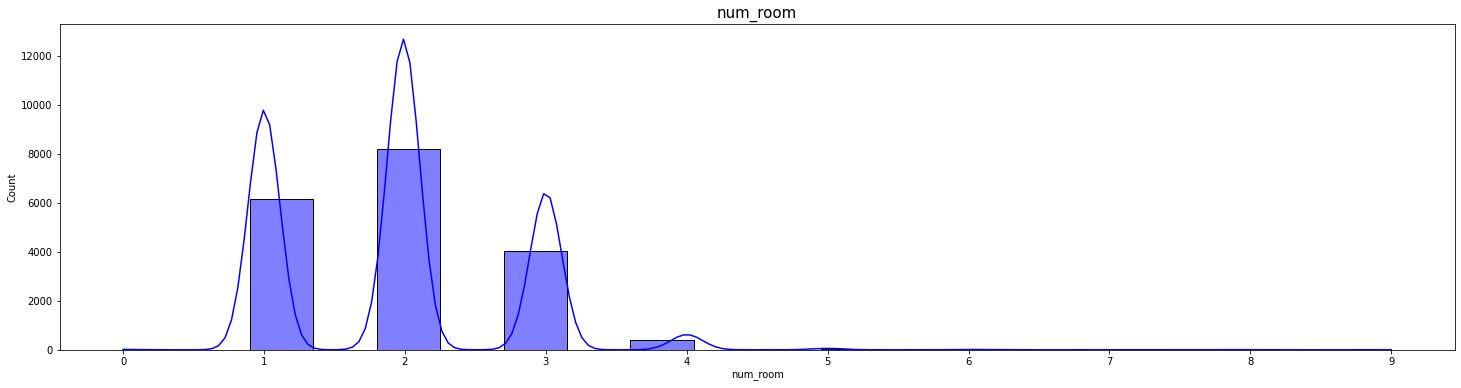

In [160]:
hist_plot_columns(df_full, ['num_room'])

Зависимость между общей площадью и количеством комнат в принципе не нужно объяснять - больше общая площадь - больше комнат, все прямолинейно, изображено двумя отдельными графиками, по причине того что количество значений по оси абсцисс сильно различаются в велиине

### 3. price_doc - full_sq / num_room

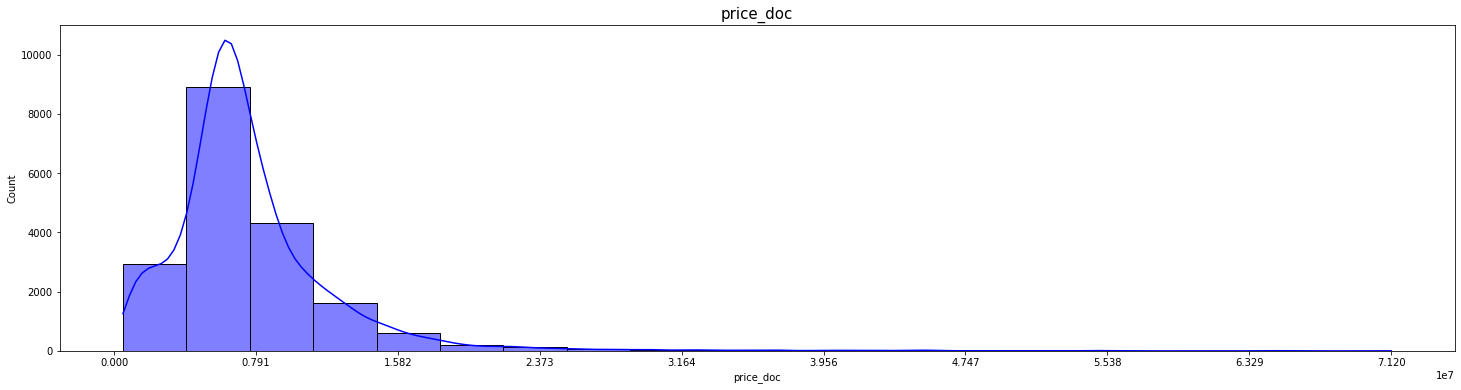

In [162]:
hist_plot_columns(df_full, ['price_doc'])

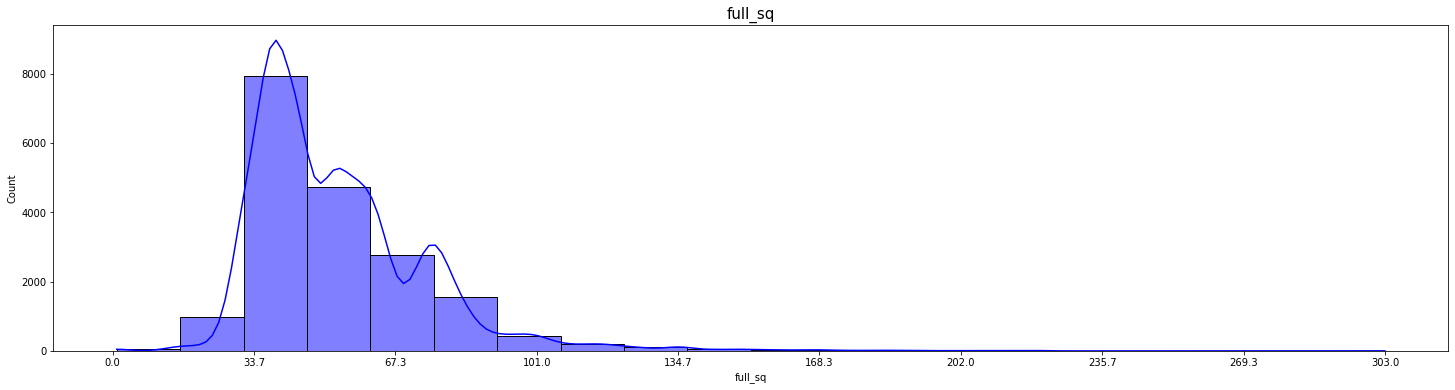

In [161]:
hist_plot_columns(df_full, ['full_sq'])

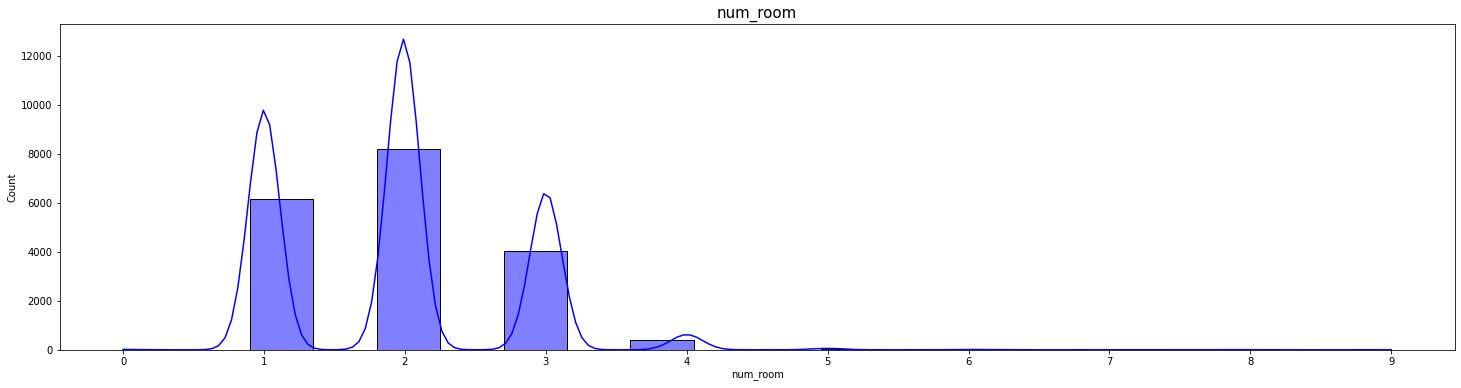

In [163]:
hist_plot_columns(df_full, ['num_room'])

Больше цена по документам - больше площадь и комнаты, что и подтверждается предыдущими пунктами

### 1.7.2 Анализ совместного влияния признаков и их влияния на целевой признак